In [1]:
from utility_bferror import *
from utility_bfcombiner import *
from utility_common import *

In [15]:
covar = np.load('../data/covar_2.npy')
covarTotal = np.sum(covar,axis=0)
beta0 = np.array([0.10883379, 0.10800187, 0.10689639,
                  0.11196685, 0.10982913, 0.10544397,
                  0.10505873, 0.10762646, 0.10785138,
                  0.11019370, 0.10963078, 0.10709402])

# 1. Uncertainty of Combined BR

[0.37821548 0.3281263  0.81389775]
10.8174 +/- 0.2137
10.8675 +/- 0.2239
10.8121 +/- 0.8067


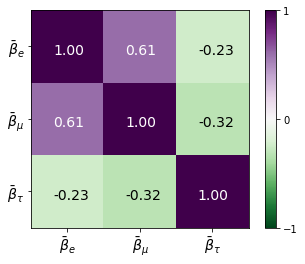

In [16]:
# statisitcal
combiner = bfCombiner(covar[0], beta0)
sigma, corr = combiner.paramSigma()
print(sigma/0.1080*100)

# total
combiner = bfCombiner(covarTotal, beta0)
sigma, corr = combiner.paramSigma()
for i in range(3):
    c, s = combiner.paramLS[i], sigma[i]
    print('{:6.4f} +/- {:6.4f}'.format(c*100,s*100 ))
    
showParameterCov(corr)
plt.savefig('../plots/covarMatrix_beta_2.png',dpi=300)

In [4]:
combiner = bfCombiner(covarTotal, beta0, paramTypy='r')
sigma, corr = combiner.paramSigma()
rVar = np.outer(sigma,sigma)*corr
rVar = rVar[0:2,0:2]
invVar = np.linalg.pinv(rVar)

r1_mean, r2_mean = 1,1 # combiner.paramLS[0], combiner.paramLS[1]

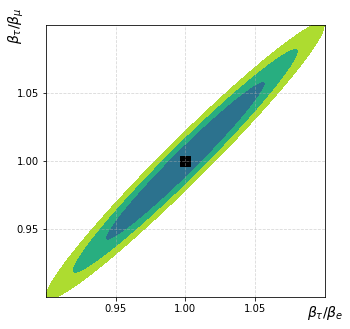

In [5]:
x = np.linspace(0.9, 1.1, 100)
y = np.linspace(0.9, 1.1, 100)
X, Y = np.meshgrid(x, y)


nll  = invVar[0,0]*(X-r1_mean)**2 
nll += invVar[1,1]*(Y-r2_mean)**2
nll += invVar[0,1]*(Y-r2_mean)*(X-r1_mean)*2
nll *= 2


plt.figure(figsize=(5,5),facecolor='w')


plt.contourf(X, Y, nll, levels=[0,1,2,3],vmax=3,vmin=-1)
plt.scatter(r1_mean, r2_mean, c='w')
plt.xticks([0.95,1,1.05])
plt.yticks([0.95,1,1.05])


plt.scatter(1, 1, c='k',marker='s',s=100)
plt.grid(True,alpha=0.5,linestyle='--')

plt.xlabel(r'$\beta_\tau / \beta_e$',fontsize=14,position=(1,1),labelpad=-10)
plt.ylabel(r'$\beta_\tau / \beta_\mu$',fontsize=14,position=(1,1),labelpad=-10)

plt.savefig('../plots/sigma.png',dpi=300)



# 2. Plot Var Matrix

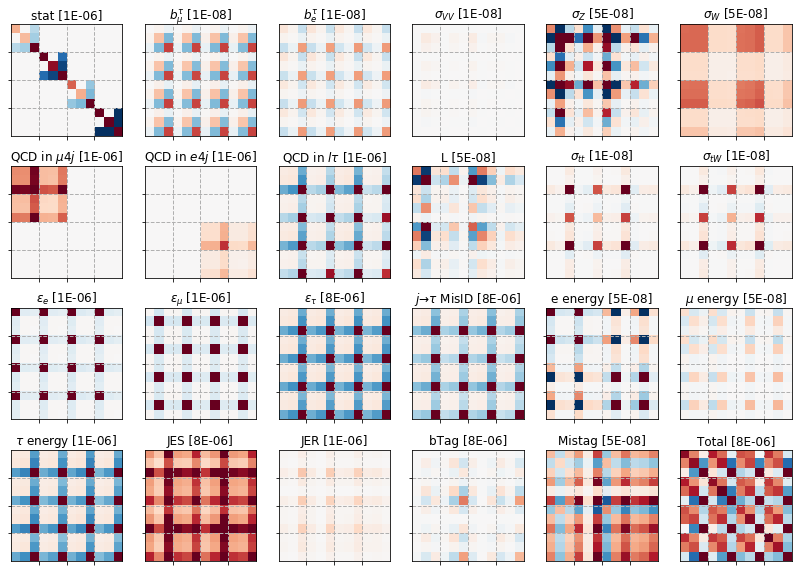

In [10]:
plt.figure(figsize=(14,10),facecolor='w')
showCovar(covar,sameCNorm=False)
plt.savefig('../plots/covarMatrix.png',dpi=300)

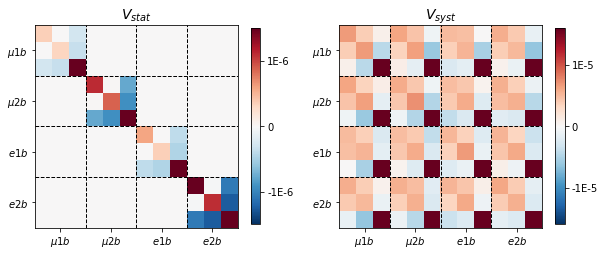

In [11]:
plt.figure(figsize=(10,4),facecolor='w')

plt.subplot(1,2,1)
mtx = covar[0] #* 10000
showSingleCovar(mtx, norm= 1.5e-6, titleName=r'$V_{stat}$')
cbar = plt.colorbar( ticks=[-1e-6, 0, 1e-6],shrink=0.9)
#cbar.ax.set_title(r'$V_{\beta_i\beta_j}$')
cbar.ax.set_yticklabels(['-1E-6', '0', '1E-6'])

plt.subplot(1,2,2)

mtx = np.sum(covar[1:],axis=0) #* 10000
showSingleCovar(mtx, norm= 16e-6, titleName=r'$V_{syst}$')
cbar = plt.colorbar( ticks=[-10e-6, 0, 10e-6],shrink=0.9)
#cbar.ax.set_title(r'$V_{\beta_i\beta_j}$')
cbar.ax.set_yticklabels(['-1E-5', '0', '1E-5'])


plt.savefig('../plots/covarMatrix_total.png',dpi=300)

In [42]:
invCovarTotal = np.linalg.pinv( covarTotal )


i3 = np.identity(3)
Amatrix = np.r_[i3,i3,i3,i3]

hess = np.matmul(Amatrix.T, np.matmul(invCovarTotal,Amatrix))
hessinv = np.linalg.pinv( hess )
factor2 = np.matmul(Amatrix.T, invCovarTotal)
Bmatrix = np.matmul(hessinv,factor2)


np.matmul(Bmatrix,beta0)

array([0.10861469, 0.10918904, 0.10579074])

In [45]:
hessinv.diagonal()**0.5/0.1080*100

array([2.07439249, 2.17529232, 6.48932311])

In [21]:
weights = np.sum(invCovarTotal,axis=1)/np.sum(invCovarTotal)
wb = weights * beta0

0.0463966216636751

In [24]:
np.sum(weights)

0.9999999999999986

In [37]:
 


np.matmul(factor1, factor2)

array([0.10861469, 0.10918904, 0.10579074])

In [35]:
factor1.matmul(factor2)

NameError: name 'factor1' is not defined